In [1]:
import os, json, sys

sys.path.append(os.path.join('..','Assets','python'))

import numpy               as np
import matplotlib.pyplot   as plt
import matplotlib.patches  as patch
import matplotlib          as mpl
import pandas              as pd
from matplotlib            import cm
from matplotlib.colors     import LinearSegmentedColormap
from global_data           import run_years

In [2]:
age_hist_bins = [i/12.0 for i in range(25)] + [2.25+i/4 for i in range(12)] + [6+i for i in range(24)]

In [3]:
mal_df = pd.read_csv('emod-malnutrition-by-age.csv')

In [4]:
grouped_df = pd.read_pickle('pickled_sim_outputs.pkl')
for indicator, group in mal_df.groupby('indicator'):  
    grouped_df[indicator.lower()] = grouped_df.apply(lambda r: np.sum(group['_estimate']/100 * r['age_hists_mean'][:36]) / np.sum(r['age_hists_mean'][:36]), axis=1)

In [5]:
#Set plotting defaults
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=14)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
plt.rc('figure', titlesize=16)   #title fontsize
plt.rc('lines', markersize=8)
plt.rc('lines', linewidth=2)

In [6]:
lookup = {'children wasted':'wasting','children stunted':'stunting'}
def malnutrition_double_plot(selected_rows, MCV1vals, vars2plot=['children wasted', 'children stunted']):

    fig, axes = plt.subplots(1,2, figsize=(12, 5))
    # colors = ['BuPu', 'YlGn']
    for ivar, (ax, var2plot) in enumerate(zip(axes, vars2plot)):
        # Get unique values of 'MCV1' to plot separate lines
        mycmap = plt.get_cmap('BuPu', 5+len(MCV1vals))
        i = 4
        for mcv1_value in MCV1vals:
            i = i+1
            # Filter rows for each MCV1 value
            subset = selected_rows[selected_rows['MCV1'] == mcv1_value].reset_index()
    
            # Sort rows by 'MCV1_age' to get a proper line plot
            subset = subset.sort_values('MCV1_age')
    
            # Plot 'Infs' vs. 'MCV1_age' for the current MCV1 value
            ax.plot(subset['MCV1_age'], (100*subset[var2plot]), label=f'Cov. = {int(100*mcv1_value)}%', 
                   color=mycmap(i))
            yv = np.min(subset[var2plot])
            xv = np.argmin(subset[var2plot])
            ax.plot(subset['MCV1_age'][xv], 100*yv, 'k.')
    
        # Set the title and labels
        ax.set_title(lookup[var2plot].capitalize())
        ax.set_xlabel('Age (months)', fontsize=14)
        ax.set_ylabel('% of u5 infections at risk\nfor severe measles due to {}'.format(lookup[var2plot]))
        ax.set_xticks([30.5*i for i in range(3, 16)])
        ax.set_xticklabels([str(i) for i in range(3, 16)])
        ax.tick_params(axis='y', which='major')

    # Show legend
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()

    return (fig, ax)

def malnutrition_single_plot(selected_rows, MCV1vals, vars2plot=['children wasted', 'children stunted']):

    fig, ax = plt.subplots(figsize=(8, 6))
    colors = ['Blues', 'Reds']
    for ivar, var2plot in enumerate(vars2plot):
        # Get unique values of 'MCV1' to plot separate lines
        mycmap = plt.get_cmap(colors[ivar], 5+len(MCV1vals))
        i = 4
        for mcv1_value in MCV1vals:
            i = i+1
            # Filter rows for each MCV1 value
            subset = selected_rows[selected_rows['MCV1'] == mcv1_value].reset_index()
    
            # Sort rows by 'MCV1_age' to get a proper line plot
            subset = subset.sort_values('MCV1_age')
    
            # Plot 'Infs' vs. 'MCV1_age' for the current MCV1 value
            ax.plot(subset['MCV1_age'], (subset[var2plot]), label=f'Cov. = {int(100*mcv1_value)}%', 
                   color=mycmap(i))
            yv = np.min(subset[var2plot])
            xv = np.argmin(subset[var2plot])
            ax.plot(subset['MCV1_age'][xv], yv, 'k.')
    
        # Set the title and labels
        ax.set_xlabel('Age (months)', fontsize=14)
        ax.set_ylabel('Fraction of u5 infections at risk for severe measles due to {}'.format(lookup[var2plot]))
        ax.set_xticks([30.5*i for i in range(3, 16)])
        ax.set_xticklabels([str(i) for i in range(3, 16)])
        ax.tick_params(axis='y', which='major')

    # Show legend
    # ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()

    return (fig, ax)

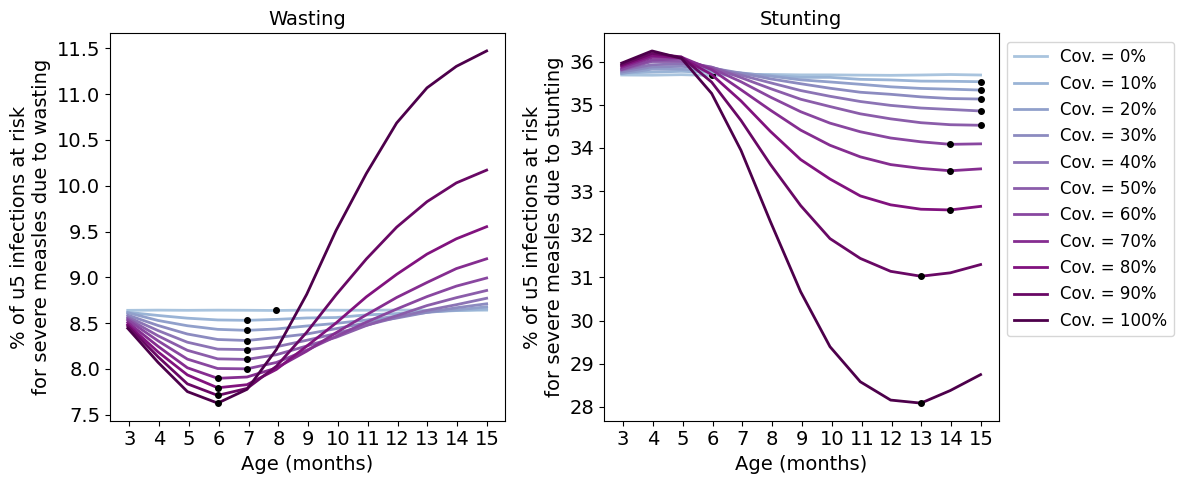

In [7]:
# Select rows where 'R0' is 16.0, all MCV1 values, no MCV2
base_cut = (grouped_df['mat_duration']==120.0) & \
(grouped_df['MCV2']<=0.1) & \
(grouped_df['mat_factor_inf']==1.0) & \
(grouped_df['mat_factor_vx']==0.4) & \
(grouped_df['MCV2_age']==1.25*365) & \
(grouped_df['start_year']==2040.0) & \
(grouped_df['timeliness_distribution'] == True) & \
(grouped_df['Ageind_vx_model']== False)

# selected_rows = grouped_df[(grouped_df['R0'] == 6.0) & base_cut]
# (fig, ax) = malnutrition_single_plot(selected_rows, np.unique(selected_rows['MCV1']))

# selected_rows = grouped_df[(grouped_df['R0'] == 16.0) & base_cut]
# (fig, ax) = malnutrition_single_plot(selected_rows, np.unique(selected_rows['MCV1']))

# selected_rows = grouped_df[(grouped_df['R0'] == 24.0) & base_cut]
# (fig, ax) = malnutrition_single_plot(selected_rows, np.unique(selected_rows['MCV1']))

# #################

# selected_rows = grouped_df[(grouped_df['R0'] == 6.0) & base_cut]
# (fig, ax) = malnutrition_double_plot(selected_rows, np.unique(selected_rows['MCV1'])[::2])

selected_rows = grouped_df[(grouped_df['R0'] == 16.0) & base_cut]
(fig, ax) = malnutrition_double_plot(selected_rows, np.unique(selected_rows['MCV1'])[::2])

# selected_rows = grouped_df[(grouped_df['R0'] == 24.0) & base_cut]
# (fig, ax) = malnutrition_double_plot(selected_rows, np.unique(selected_rows['MCV1']))

In [8]:
# def line_plot_age(selected_rows, MCV1vals, var2plot='Inf_mean_nrm'):
#     fig, ax = plt.subplots(figsize=(8, 6))

#     # Get unique values of 'MCV1' to plot separate lines
#     mycmap = plt.get_cmap('Blues', 5+len(MCV1vals))
#     i = 4
#     for mcv1_value in MCV1vals:
#         i = i+1
#         # Filter rows for each MCV1 value
#         subset = selected_rows[selected_rows['MCV1'] == mcv1_value].reset_index()

#         # Sort rows by 'MCV1_age' to get a proper line plot
#         subset = subset.sort_values('MCV1_age')

#         # Plot 'Infs' vs. 'MCV1_age' for the current MCV1 value
#         ax.plot(subset['MCV1_age'], (subset[var2plot]), label=f'Cov. = {int(100*mcv1_value)}%', 
#                color=mycmap(i))
#         yv = np.min(subset[var2plot])
#         xv = np.argmin(subset[var2plot])
#         ax.plot(subset['MCV1_age'][xv], yv, 'k.')

#     # Set the title and labels
#     ax.set_title('Infections vs. age at MCV1 vaccination')
#     ax.set_xlabel('Age (months)', fontsize=14)
#     ax.set_ylabel('Mean infections per year per 100k')
#     ax.set_xticks([30.5*i for i in range(3, 16)])
#     ax.set_xticklabels([str(i) for i in range(3, 16)])
#     ax.tick_params(axis='y', which='major')

#     # Show legend
#     ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
#     plt.tight_layout()

#     return (fig, ax)


In [9]:
# # Select rows where 'R0' is 16.0, all MCV1 values, no MCV2
# base_cut = (grouped_df['mat_duration']==120.0) & \
# (grouped_df['MCV2']<=0.1) & \
# (grouped_df['mat_factor_inf']==1.0) & \
# (grouped_df['mat_factor_vx']==0.4) & \
# (grouped_df['MCV2_age']==1.25*365) & \
# (grouped_df['start_year']==2040.0) & \
# (grouped_df['timeliness_distribution'] == True) & \
# (grouped_df['Ageind_vx_model']== False)

# selected_rows = grouped_df[(grouped_df['R0'] == 6.0) & base_cut]
# (fig, ax) = line_plot_age(selected_rows, np.unique(selected_rows['MCV1']))
# ax.set_title('Infections vs. age at MCV1 vaccination \n $R_0$ = 6, no MCV2')

# plt.show()

# fig.savefig('MCV1only_AAV_R06.svg', format='svg', dpi=1000)

# selected_rows = grouped_df[(grouped_df['R0'] == 16.0) & base_cut]
# (fig, ax) = line_plot_age(selected_rows, np.unique(selected_rows['MCV1']))
# ax.set_title('Infections vs. age at MCV1 vaccination \n $R_0$ = 16, no MCV2')

# plt.show()

# fig.savefig('MCV1only_AAV_R016.svg', format='svg', dpi=1000)

# # Select rows where 'R0' is 16.0, all MCV1 values, no MCV2
# selected_rows = grouped_df[(grouped_df['R0'] == 24.0) & base_cut]
# (fig, ax) = line_plot_age(selected_rows, np.unique(selected_rows['MCV1']))
# ax.set_title('Infections vs. age at MCV1 vaccination \n $R_0$ = 24, no MCV2')

# plt.show()

# fig.savefig('MCV1only_AAV_R024.svg', format='svg', dpi=1000)

# selected_rows = grouped_df[(grouped_df['R0'] == 6.0) & base_cut]
# (fig, ax) = line_plot_age(selected_rows, np.unique(selected_rows['MCV1']), var2plot='estimated_fatalities_nrm')
# ax.set_ylabel('Mean deaths per year per 100k')
# ax.set_title('Deaths vs. age at MCV1 vaccination \n $R_0$ = 6, no MCV2')

# plt.show()

# fig.savefig('MCV1only_AAV_R06_fatalities.svg', format='svg', dpi=1000)

# selected_rows = grouped_df[(grouped_df['R0'] == 16.0) & base_cut]
# (fig, ax) = line_plot_age(selected_rows, np.unique(selected_rows['MCV1']), var2plot='estimated_fatalities_nrm')
# ax.set_ylabel('Mean deaths per year per 100k')
# ax.set_title('Deaths vs. age at MCV1 vaccination \n $R_0$ = 16, no MCV2')

# plt.show()

# fig.savefig('MCV1only_AAV_R016_fatalities.svg', format='svg', dpi=1000)

# # Select rows where 'R0' is 16.0, all MCV1 values, no MCV2
# selected_rows = grouped_df[(grouped_df['R0'] == 24.0) & base_cut]
# (fig, ax) = line_plot_age(selected_rows, np.unique(selected_rows['MCV1']), var2plot='estimated_fatalities_nrm')
# ax.set_ylabel('Mean deaths per year per 100k')
# ax.set_title('Deaths vs. age at MCV1 vaccination \n $R_0$ = 24, no MCV2')

# plt.show()

# fig.savefig('MCV1only_AAV_R024_fatalities.svg', format='svg', dpi=1000)


# selected_rows = grouped_df[(grouped_df['R0'] == 6.0) & base_cut]
# (fig, ax) = line_plot_age(selected_rows, np.unique(selected_rows['MCV1'])[::2])
# ax.set_title('Infections vs. age at MCV1 vaccination \n $R_0$ = 6, no MCV2')

# plt.show()

# fig.savefig('MCV1only_AAV_R06_fewerlines.svg', format='svg', dpi=1000)

# selected_rows = grouped_df[(grouped_df['R0'] == 16.0) & base_cut]
# (fig, ax) = line_plot_age(selected_rows, np.unique(selected_rows['MCV1'])[::2])
# ax.set_title('Infections vs. age at MCV1 vaccination \n $R_0$ = 16, no MCV2')

# plt.show()

# fig.savefig('MCV1only_AAV_R016_fewerlines.svg', format='svg', dpi=1000)

# # Select rows where 'R0' is 16.0, all MCV1 values, no MCV2
# selected_rows = grouped_df[(grouped_df['R0'] == 24.0) & base_cut]
# (fig, ax) = line_plot_age(selected_rows, np.unique(selected_rows['MCV1'])[::2])
# ax.set_title('Infections vs. age at MCV1 vaccination \n $R_0$ = 24, no MCV2')

# plt.show()

# fig.savefig('MCV1only_AAV_R024_fewerlines.svg', format='svg', dpi=1000)

# selected_rows = grouped_df[(grouped_df['R0'] == 6.0) & base_cut]
# (fig, ax) = line_plot_age(selected_rows, np.unique(selected_rows['MCV1'])[::2], var2plot='estimated_fatalities_nrm')
# ax.set_ylabel('Mean deaths per year per 100k')
# ax.set_title('Deaths vs. age at MCV1 vaccination \n $R_0$ = 6, no MCV2')

# plt.show()

# fig.savefig('MCV1only_AAV_R06_fatalities_fewerlines.svg', format='svg', dpi=1000)

# selected_rows = grouped_df[(grouped_df['R0'] == 16.0) & base_cut]
# (fig, ax) = line_plot_age(selected_rows, np.unique(selected_rows['MCV1'])[::2], var2plot='estimated_fatalities_nrm')
# ax.set_ylabel('Mean deaths per year per 100k')
# ax.set_title('Deaths vs. age at MCV1 vaccination \n $R_0$ = 16, no MCV2')

# plt.show()

# fig.savefig('MCV1only_AAV_R016_fatalities_fewerlines.svg', format='svg', dpi=1000)

# # Select rows where 'R0' is 16.0, all MCV1 values, no MCV2
# selected_rows = grouped_df[(grouped_df['R0'] == 24.0) & base_cut]
# (fig, ax) = line_plot_age(selected_rows, np.unique(selected_rows['MCV1'])[::2], var2plot='estimated_fatalities_nrm')
# ax.set_ylabel('Mean deaths per year per 100k')
# ax.set_title('Deaths vs. age at MCV1 vaccination \n $R_0$ = 24, no MCV2')

# plt.show()

# fig.savefig('MCV1only_AAV_R024_fatalities_fewerlines.svg', format='svg', dpi=1000)

In [10]:
# # Select rows where 'R0' is 16.0, all MCV1 values, no MCV2
# base_cut = (grouped_df['mat_duration']==120.0) & \
# (grouped_df['MCV2']==0.0) & \
# (grouped_df['mat_factor_inf']==1.0) & \
# (grouped_df['mat_factor_vx']==0.4) & \
# (grouped_df['MCV2_age']==1.25*365) & \
# (grouped_df['start_year']==2040.0) & \
# (grouped_df['timeliness_distribution'] == True) & \
# (grouped_df['Ageind_vx_model']== False)

# for MCV1 in [i/10 for i in range(10)]:
#     selected_rows = grouped_df[(age_df['R0'] == 16.0) & (grouped_df['MCV1']==MCV1) & base_cut]
#     (fig, ax) = age_hists(selected_rows, np.unique(selected_rows['MCV1_age'])[[3, 6]])
#     ax.set_title('Infections vs. age at MCV1 vaccination \n MCV1 coverage = '+str(int(100*MCV1))+'%')

#     plt.show()

#     fig.savefig('MCV0_Agehists_R016_Cov'+str(int(100*MCV1))+'.svg', format='svg', dpi=1000)
    
    
# for MCV1 in [i/10 for i in range(10)]:
#     selected_rows = grouped_df[(age_df['R0'] == 16.0) & (grouped_df['MCV1']==MCV1) & base_cut]
#     (fig, ax) = age_hists_norm(selected_rows, np.unique(selected_rows['MCV1_age'])[::3])
#     ax.set_title('Normalized Infections vs. age at MCV1 vaccination \n MCV1 coverage = '+str(int(100*MCV1))+'%')

#     plt.show()

#     fig.savefig('MCV0_Agehists_norm_R016_Cov'+str(int(100*MCV1))+'.svg', format='svg', dpi=1000)

NameError: name 'age_df' is not defined